<a href="https://colab.research.google.com/github/Dushani-Ranasinghe/phishing-website-detector/blob/main/Phishing_website_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem**

Phishing websites are malicious sites designed to deceive users into providing sensitive information, such as login credentials, credit card numbers, or other personal data. These sites often mimic legitimate websites to trick users into thinking they are interacting with a trusted entity.

Detecting phishing websites is crucial for several reasons:
*   **Protecting Personal Information:** Phishing sites aim to steal personal and financial information, which can lead to identity theft and financial loss.
*   **Preventing Malware Infections:** Clicking on links in phishing emails or on phishing websites can result in malware being installed on your device, compromising your security.
*   **Safeguarding Reputations:** Phishing attacks can damage the reputation of the companies being impersonated, as users may lose trust in their services.
*   **Avoiding Financial Loss:** Phishing can lead to unauthorized transactions and financial fraud, causing significant monetary damage.

### **Goal**

To classify websites as either phishing or legitimate based on various features.
1. URL Length: The total number of characters in the URL.
Phishing URLs are often longer than legitimate ones, as they may include extra characters or obfuscation.

2. Number of Subdomains: Count the number of subdomains in the URL.
Phishing sites may use multiple subdomains to appear more legitimate.

3. Presence of HTTPS: Check if the URL starts with "https://".
Legitimate websites typically use HTTPS for secure communication, while many phishing sites do not.

4. Domain Registration Length: The age of the domain (how long it has been registered).
Phishing sites are often newly registered domains.

5. Use of Special Characters: Count the number of special characters (e.g., @, -, _, !, etc.) in the URL.
Phishing URLs may include unusual characters to trick users.
6. Presence of IP Address: Check if the URL contains an IP address instead of a domain name.
Phishing sites may use IP addresses to avoid detection.

7. Domain Name Similarity: Measure the similarity between the domain name and known legitimate domains (e.g., using Levenshtein distance).
Phishing sites often use domain names that are similar to popular sites to deceive users.

8. Keyword Presence: Identify the presence of specific keywords in the URL (e.g., "login", "secure", "account").
Phishing URLs often contain words that suggest urgency or security.

9. Redirects: Check if the URL contains redirection parameters (e.g., redirect=, goto=).
Phishing sites may use redirects to lead users to malicious pages.

10. Path Length: The number of segments in the URL path.
Longer paths may indicate a more complex structure often used by phishing sites.

11. File Extensions: Check for suspicious file extensions (e.g., .exe, .zip, .php).
Legitimate websites typically do not serve executable files.

12. Favicon Presence: Check if the site has a favicon and its similarity to known legitimate favicons.
Phishing sites may lack a favicon or use a generic one.

### **Data Collection**

## **Dataset:**
Web page Phishing Detection Dataset - Kaggle
[link text](https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset)

This dataset contains 87 features extracted from phishing webpages and 5000 legitimate webpages, which were downloaded from January to May 2015.

The features are from three different classes:


*   **Address Bar Based Features:** These features are based on the URL and domain name of the webpage.
*   **HTML and JavaScript Based Features:** These features are based on the HTML tags and JavaScript content of the webpage.
*   **Domain Based Features:** These features are based on the domain name of the webpage.**bold text**

upload kaggle.json

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uththaradushani","key":"42170ce93b2c49630332547b1c1eae3a"}'}

set kaggle directory and move kaggle.json file

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download the dataset

In [3]:
!kaggle datasets download -d shashwatwork/web-page-phishing-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 116MB/s]


Unzip dataset

In [4]:
!unzip web-page-phishing-detection-dataset.zip

Archive:  web-page-phishing-detection-dataset.zip
  inflating: dataset_phishing.csv    


Load the Dataset into a DataFrame

In [5]:
import pandas as pd
df = pd.read_csv('dataset_phishing.csv')

Explore dataset

In [6]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (11430, 89)


11430 urls and 87 extracted features

In [7]:
# Display the first few rows
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [8]:
# Get summary statistics
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [10]:
# Check data types
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


In [11]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

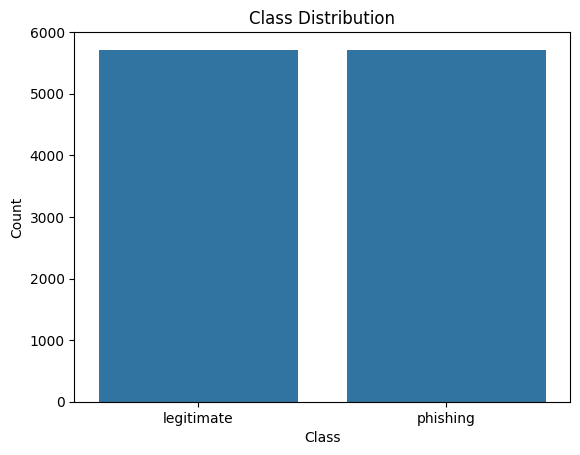

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the target variable is named 'status'
sns.countplot(x='status', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The dataset is balanced (classes are balanced), it contains exactly 50% phishing and 50% legitimate URLs.

 Drop the URL column and create a new DataFrame without it

 Reasons:

*   ML algorithms require numerical ouputs and we have already extracted relevent features from the url
*   Now we can focus only on features that are relevent for classification



In [16]:
new_df = df.drop('url', axis=1)
print(new_df.head())

   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  ...  domain_in_title  domain_with_copyright  \
0      0      0  ...                0                      1   
1      0      0  ...                1                      0   
2      0      3  ...                1                      0   
3      0      0  ...                1                      0   
4      0      0  ...                0                      1   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                          45    

## **Data Preprocessing**

Data Cleaning

# **EDA: Exploratory Data Analysis**
*    Summarizing and visualizing the main characteristics of a dataset.
*    To understand the properties of a dataset, identify patterns, spot anomalies, and test hypotheses without relying on formal modeling.
*    Key objectives:
          * To understand data distribution
          * To identify patterns and distributions
          * To detect outliers
          * To generate hypotheses
          * To clean data
*    Common Techniques
          * Visualization
          * Summary Statistics
          * Correlation analysis


Separate columns into numerical and categorical ones.

In [19]:
# Get a list of all columns in new dataframe
cols = new_df.columns.to_list()

# Identify the numerical columns
num_cols = new_df.select_dtypes(include=['number']).columns.to_list()

# Identify the categorical columns
cat_cols = list(set(cols) - set(num_cols))
# or can use
# cat_cols = new_df.select_dtypes(include=['object']).columns.to_list()

# Display the lists
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_e

Examining numerical features in the dataset to identify and print values that are less than 0.

In [20]:
# Identify values below 0 in each numerical feature
for col in num_cols:
    # Get unique values in the column
    list_unique_value_col = new_df[col].unique()

    # Extract values less than 0
    sublist_unique_value_col = [x for x in list_unique_value_col if x < 0]

    # If values less than 0 exist, print the column name and sorted values
    if sublist_unique_value_col:
        print(col, '-', sorted(sublist_unique_value_col, reverse=True))

domain_registration_length - [-1]
domain_age - [-1, -2, -12]


Negative values in the two features above are meaningless, thus treated as errors/missing values. Therefore replace them with NaN.

In [21]:
import numpy as np
new_df.replace([-1.-1,-2,-12], np.nan, inplace=True)


nan_check = new_df.isna()

if nan_check.any().any():
    nan_percentage = (nan_check.sum().sum() / new_df.size) * 100
    print(f"There are NaN values in the DataFrame. NaN Percentage: {nan_percentage:.2f}%")
    print("Locations of NaN values:")
    print(new_df[new_df.isna()])
else:
    print("There are no NaN values in the DataFrame.")

There are NaN values in the DataFrame. NaN Percentage: 0.01%
Locations of NaN values:
       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0             NaN              NaN NaN      NaN         NaN    NaN    NaN   
1             NaN              NaN NaN      NaN         NaN    NaN    NaN   
2             NaN              NaN NaN      NaN         NaN    NaN    NaN   
3             NaN              NaN NaN      NaN         NaN    NaN    NaN   
4             NaN              NaN NaN      NaN         NaN    NaN    NaN   
...           ...              ...  ..      ...         ...    ...    ...   
11425         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11426         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11427         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11428         NaN              NaN NaN      NaN         NaN    NaN    NaN   
11429         NaN              NaN NaN      NaN         NaN    NaN 

Calculate the percentage of missing values for each feature in the dataset.

In [22]:
# Calculate the missing value percentage for each column
missing_percentage = (new_df.isnull().sum().sum() / len(new_df)) * 100

new_df.isnull().sum()
print(f"Missing Percentage: {missing_percentage:.2f}%")

# Print the column names that contain missing values
for column in new_df.columns:
  if(new_df[column].isnull().any()):
    print(column)

Missing Percentage: 0.49%
domain_age


Plot the percentages of missing values for selected features using horizontal bar chart.

Overall NaN Percentage: 0.00557%


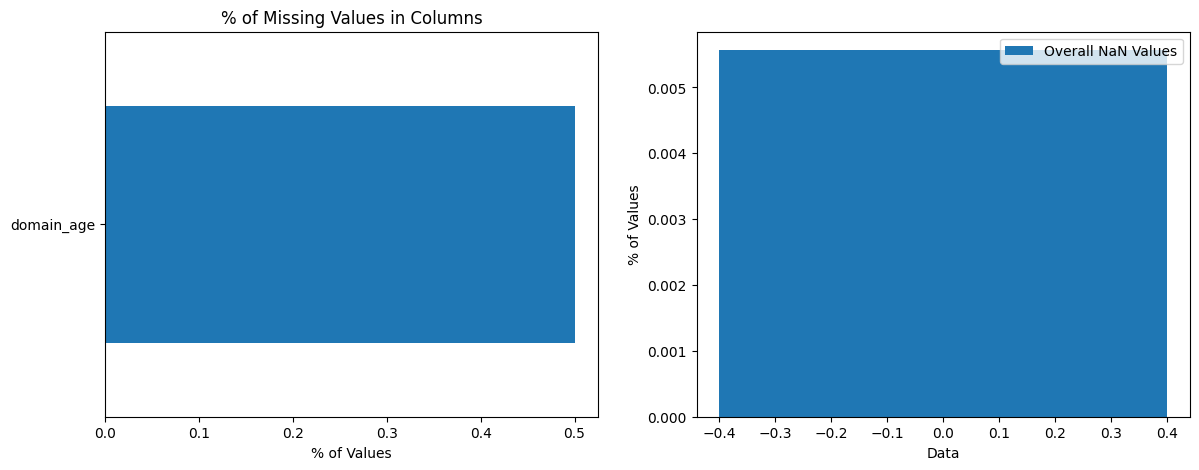

In [24]:
# Calculate the percentages of missing values for features
df_null_cols = round((new_df.isnull().sum() / new_df.shape[0] * 100), 1)

# Calculate the overall percentage of missing values in the entire dataset
overall_nan_percentage = (new_df.isna().sum().sum() / new_df.size) * 100

print(f"Overall NaN Percentage: {overall_nan_percentage:.5f}%")

# Select features with at least one missing value
missing_cols = df_null_cols[df_null_cols > 0.0]

# Plot the percentages of missing values for selected features
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
missing_cols.plot.barh(ax=ax[0], title='% of Missing Values in Columns', width=0.8)
ax[0].set_xlabel('% of Values')

# Plot the overall percentage of missing values in the entire dataset
ax[1].bar(0, overall_nan_percentage, label='Overall NaN Values')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('% of Values')
ax[1].legend()

plt.show()

Remove the rows with NaN or null values from the DataFrame

This step is a common data preprocessing technique to ensure the quality of the data and prepare it for further analysis. Rows with missing values are often removed if they cannot be imputed or if they significantly affect the analysis or modeling process.

In [25]:
# Remove rows with NaN or null values
new_df = new_df.dropna()

print("\nDataFrame after removing rows with NaN or null values:")
print(new_df)


DataFrame after removing rows with NaN or null values:
       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_o

Handle duplicate values

In [26]:
# Get the original number of rows
original_rows = new_df.shape[0]

# Remove duplicated records, keeping the first occurrence
new_df.drop_duplicates(keep='first', inplace=True)

# Get the number of rows after removing duplicates
new_rows = new_df.shape[0]

# Calculate and print the number of deleted duplicated rows
deleted_rows = original_rows - new_rows
print('Number of deleted duplicated rows:', deleted_rows)

Number of deleted duplicated rows: 173


Removing Other Unnecessary Columns

Removing unnecessary columns with zero variance, contain only one unique value.

In [27]:
# Get the list of columns
cols = new_df.columns.to_list()

# Identify and remove irrelevant columns with zero variance (only one unique value)
print('Irrelevant column(s) dropped:')
for col in cols:
    counts_unique_values = round(new_df[col].value_counts(sort=True, normalize=True), 3)

    # Check if the fraction of the most common value is 1, which means only one unique value exists in the column
    if counts_unique_values.iloc[0] == 1.0:
        print(col)
        new_df.drop([col], axis=1, inplace=True)

# The irrelevant columns have been removed from the DataFrame

Irrelevant column(s) dropped:
nb_or
punycode
path_extension
ratio_nullHyperlinks
ratio_intRedirection
ratio_intErrors
submit_email
sfh


# **Handling Outliers and Checking the Data Distribution**
Creating box plots for the numerical features in the dataset.

The box plots provide a visual representation of the distribution, central tendency, and spread of the numerical features, which helps to identify potential outliers and understand the data's characteristics. This visualization is often used for data exploration and quality assessment.

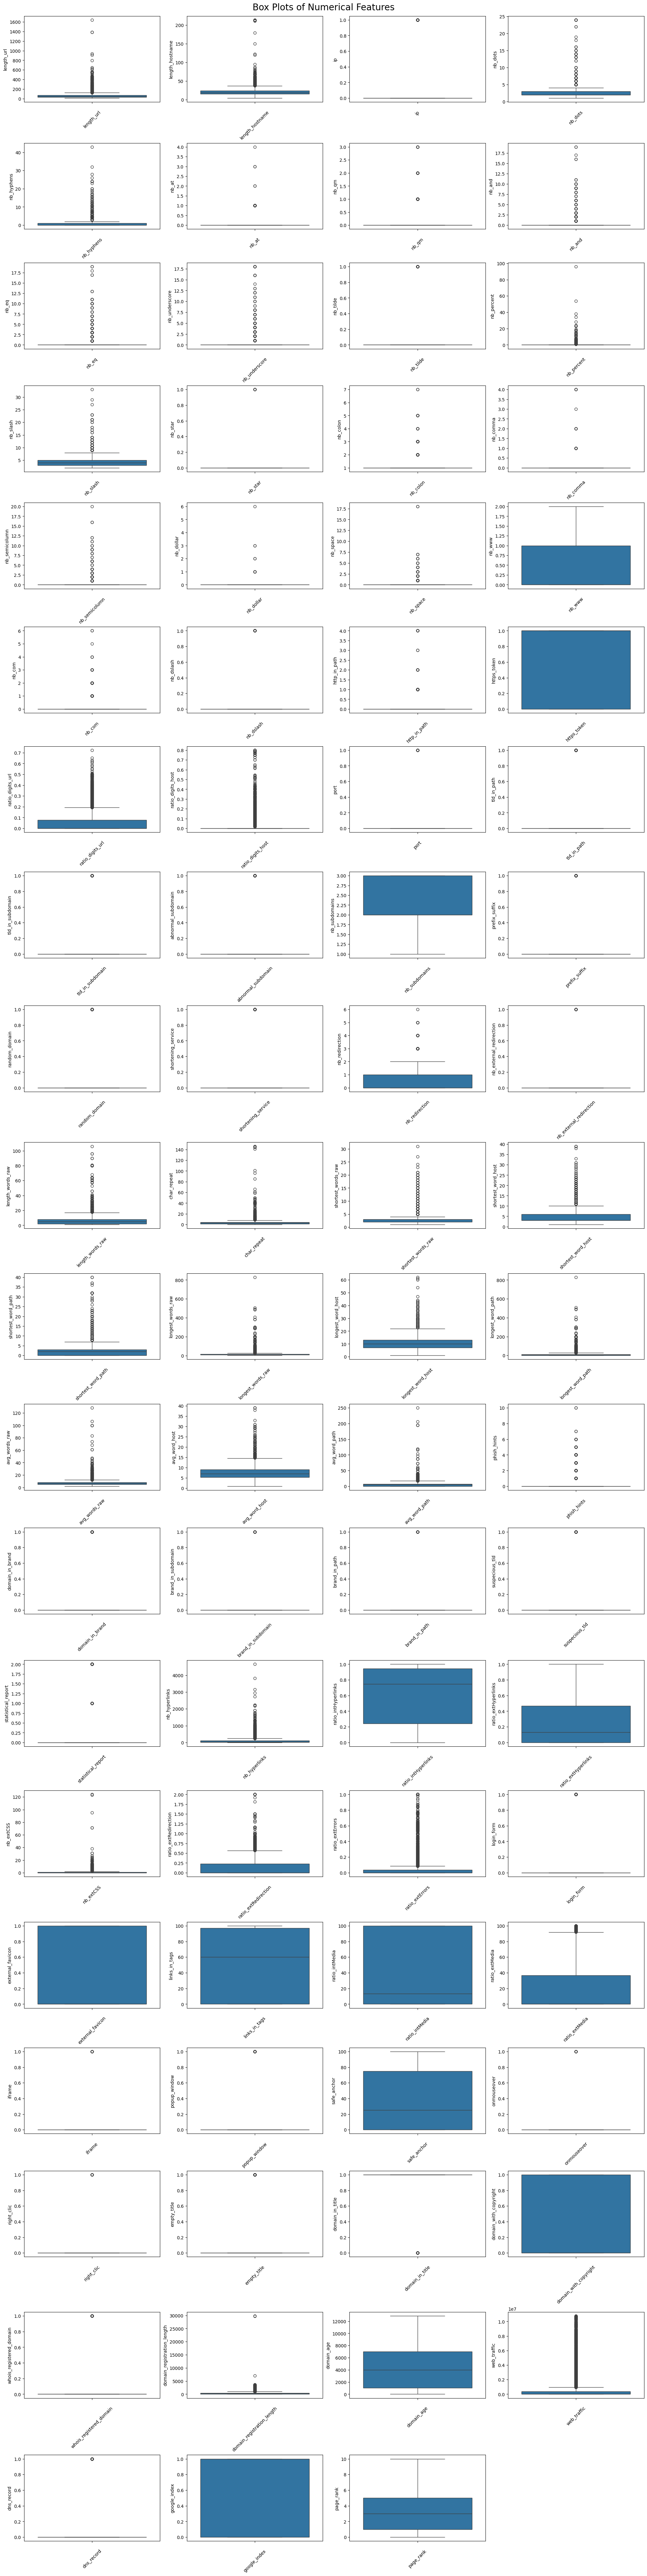

In [36]:
# Select numerical columns
numerical_cols = new_df.select_dtypes(include='number').columns.to_list()

# Calculate the number of rows and columns for the subplots
num_cols = 4
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots for box plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), constrained_layout=True)
fig.suptitle('Box Plots of Numerical Features', fontsize=20)

# Flatten the axes
axes = axes.flatten()

# Iterate through numerical columns
for ax, col in zip(axes, numerical_cols):
    # Create a box plot for each numerical column
    sns.boxplot(new_df[col], ax=ax)
    ax.set_xlabel(col, rotation=45, fontsize=10, labelpad=10)

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

# Show the box plots
plt.show()


In [15]:
# Correlation matrix
# Check the data types of each column
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix using only numeric columns
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


Preprocess data

Split dataset

Train a machine learning model

Evaluate model performance

Iterate and improve model